# Linear Example Using AUTO MPG Data

In [1]:
import requests
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

Read in the auto mpg data set from UCI Machine Learning Library.

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
r = requests.get(url)

file = r.text.replace("\t"," ")

# list_labels written manually:
list_labels = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin','car name']

df = pd.read_csv(StringIO(file),sep="\s+",header = None,names=list_labels)

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


Create a linear model to represent relationship between number of cylinders and mpg.

In [4]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(df[['cylinders']])
train_y = np.asanyarray(df[['mpg']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-3.56288658]]
Intercept:  [42.9493135]


This model is univariate linear regression model is highly explainable.

It's simply. 
y = ax +b

In this example, the coefficent is -3.56 and the interecpt is 42.95. If we know what our cylinder size, we can easily calculate the models predicted mpg. For example if we have  4 cylinder car
y= -3.56*4 + 42.95
y = 28.71

In [5]:
-3.56*4 + 42.95

28.71

We can plot the mpg compared to the number of cylinders and add our regression line and see how this prediction is consistent with the line.

Text(0, 0.5, 'MPG')

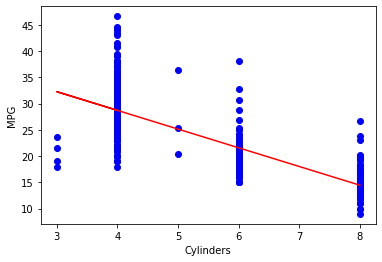

In [6]:
plt.scatter(df.cylinders, df.mpg,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Cylinders")
plt.ylabel("MPG")

The downside of this is that 4 cylinder cars have a pretty large range of mpgs, from the high teens to the mid forties.
While on average we may be right, most often than not we will be incorrect.

That's why we need more attributes and more sophisticated models to increase our accuracy.